
Data set se srdečními chorobami




In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [14]:
df = pd.read_csv("C:\\Users\\MARTA\\Desktop\\git david\\heart-disease.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# nelíbí se mi název y (target) - je to naše hodnota, kterou chceme předpovědět....
df.rename(columns={'target': 'Nemocny'}, inplace=True)

print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  Nemocny  
0   0     1        1  
1   0     2        1  
2   0     2        1  
3   0     2        1  
4   0     2        1  


In [27]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Nemocny
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [35]:
# nejdříve describe, pak is null
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
Nemocny     0
dtype: int64

In [42]:
print(df.info())
import seaborn as sns
sns.set()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  Nemocny   303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [41]:
print(df["Nemocny"].value_counts())

Nemocny
1    165
0    138
Name: count, dtype: int64


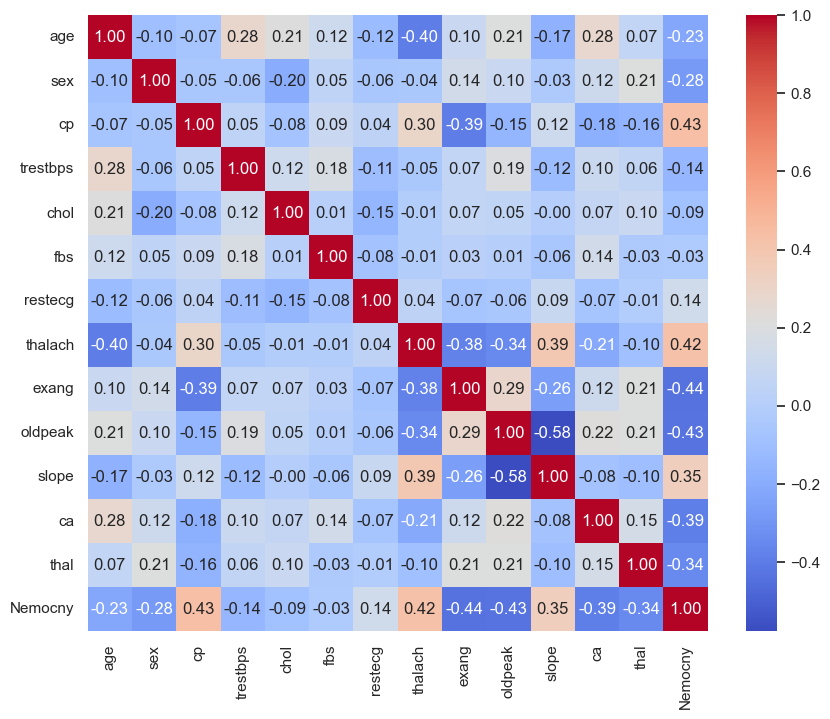

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [49]:
# Silná korelace
# cp (dle google typ bolesti na hrudi) a Nemocný  → Středně silná pozitivní korelace (~0.43), což naznačuje, že cp je důležitý prediktor.
# věk a trestbps (klidový krevní tlak) → Středně silná pozitivní korelace (~0.28)
# věk a thalach (maximální dosažená srdeční frekvence) → Silná negativní korelace (~-0.40), což znamená, že mladší pacienti mají tendenci mít vyšší maximální srdeční frekvenci.
# Slabě korelované proměnné 
# chol (cholesterol) a cp (-0.08) → Velmi nízká korelace, což naznačuje, že hladina cholesterolu sama o sobě nemusí být silným prediktorem srdečních onemocnění v tomto datasetu.
# sex (pohlaví) a cp (-0.05) → Pohlaví nemá výrazný vliv na typ bolesti na hrudi.


In [58]:
vybrane = ["cp", "thalach", "oldpeak", "exang", "slope", "ca", "thal"]
X = df[vybrane]
y = df["Nemocny"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 7), (61, 7), (242,), (61,))

In [60]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [64]:
model = RandomForestClassifier()


In [66]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
y_prediction = model.predict(X_test)

In [68]:
# Evaluating model on TRAINING DATA
model.score(X_train, y_train)

1.0

In [69]:
# Evaluating model on TEST DATA
model.score(X_test, y_test)

0.819672131147541

DALSI MOZNE MODELY

In [71]:
# ˇprotože už máme data, můžeme si zkusit dalsí modely, třeba dopadnou lépe

from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression


In [83]:
random_forest_model = {"RandomForestClassifier": RandomForestClassifier()}
# tady si nejdříve dáme níš model do dictionary 
# nebo models = []
# models.append(("LR", LogisticRegression(solver='liblinear', multi_class='ovr')))
# models.append(("SVC",LinearSVC))
# models.append(("KNN", KNeighborsClassifier()))
# models.append(("SVM", SVC(gamma='auto')))
# results = []
models= {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}

# Všechny mají fit a score, fit() na trénovací a potom score() na testovací

In [86]:
porovnani_modelu = {}
for model_name, model in random_forest_model.items():
    model.fit(X_train, y_train)
    porovnani_modelu[model_name] = model.score(X_test, y_test)
porovnani_modelu

{'RandomForestClassifier': 0.819672131147541}

In [91]:
# looping na items na trénovací data
np.random.seed(42)
# použiju random_state nebo np.random.seed(), aby se výsledky se při každém spuštění buňky nelišily
for model_name, model in models.items():
    model.fit(X_train, y_train)
    porovnani_modelu[model_name] = model.score(X_test, y_test)
porovnani_modelu

{'RandomForestClassifier': 0.8032786885245902,
 'LinearSVC': 0.47540983606557374,
 'KNN': 0.7540983606557377,
 'SVC': 0.6721311475409836,
 'LogisticRegression': 0.7704918032786885}

<Axes: >

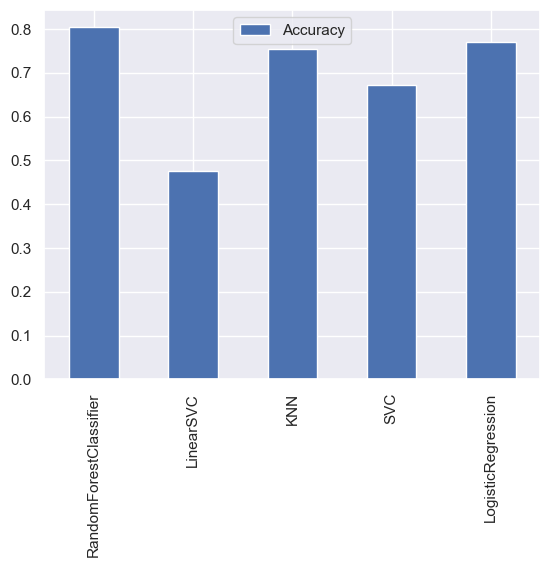

In [93]:
# vizuálně se podíváme, na výsledky
# ˇuděláme is z toho dataframe

porovnani_modelu_df = pd.DataFrame(porovnani_modelu.values(), 
                          porovnani_modelu.keys(), 
                          columns=["Accuracy"])


porovnani_modelu_df.plot.bar()

In [94]:
# s použitím toho random seed nám Random Forest vyšel jako nejvhodnější

EVALUACE MODELU

In [98]:
# Preciznost – kolik předpovězených pozitivních případů je skutečně správných?
# Recall – kolik skutečných pozitivních případů bylo správně předpovězeno?
# F1-skóre vyvažuje preciznost a citlivost.

for model_name, clf in random_forest_model.items():
    y_pred = clf.predict(X_test)
    print(f"\n{model_name} Performance:")
    print(classification_report(y_test, y_pred))


RandomForestClassifier Performance:
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61



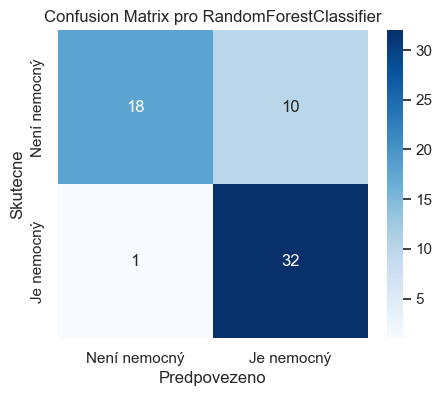

In [104]:
# ˇprecision je ok, recall je horší u zdravých - nesprávně klasifikovány jako mající nemoc --a to je u healthcare dat problem
# ten stejný problem si můžeme vizuálně potvrdit i na heatmapě ...
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Není nemocný", "Je nemocný"], yticklabels=["Není nemocný", "Je nemocný"])
    plt.xlabel("Predpovezeno")
    plt.ylabel("Skutecne")
    plt.title(f"Confusion Matrix pro {model_name}")
    plt.show()
    
for model_name, clf in random_forest_model.items():
    y_pred = clf.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, model_name)

In [105]:
# ˇmoc vysoké íslo,špatně diagnostikovat

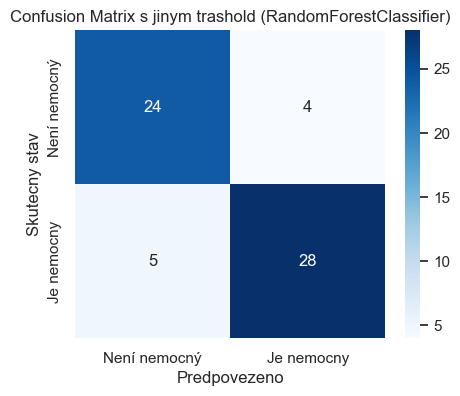

In [119]:

# potebujeme pravděpodobnosti pro "má nemoc"
y_probs = random_forest_model["RandomForestClassifier"].predict_proba(X_test)[:, 1]

# normálně je threashold na 0,5
new_threshold = 0.68 
# příjde mi ideální


y_pred_new = (y_probs >= new_threshold).astype(int)
# tady zkouším do nekonečna 0.55,0,6,0,65....0,7 sice snížilo false negative,ale zvýšilo false positive

def plot_confusion_matrix(y_true, y_pred, model_name="RandomForestClassifier"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Není nemocný", "Je nemocny"], yticklabels=["Není nemocný", "Je nemocny"])
    plt.xlabel("Predpovezeno")
    plt.ylabel("Skutecny stav")
    plt.title(f"Confusion Matrix s jinym trashold ({model_name})")
    plt.show()

plot_confusion_matrix(y_test, y_pred_new)


In [121]:
# ještě weits jdou řešit, dát do toho X ještě ty ostatní ukazatele, nebo i jiný model


In [128]:
# VYZKOUŠÍME SI MODEL
model = random_forest_model["RandomForestClassifier"]
# protože máme x definováno jako vybrane = ["cp", "thalach", "oldpeak", "exang", "slope", "ca", "thal"]
# X = df[vybrane]

dummy_data = {
    "cp": 1,         
    "thalach": 150, 
    "oldpeak": 2.3,  
    "exang": 0,      
    "slope": 2,      
    "ca": 0,         
    "thal": 3      
}
# tady si je nutné vygooglit rozpětí těch testů
# ["cp", "thalach", "oldpeak", "exang", "slope", "ca", "thal"]
dummy_df = pd.DataFrame([dummy_data])


prediction = model.predict(dummy_df)  
print(f"Pacient je: {prediction[0]}")  


Pacient je: 1


CHCEME UDELAT NEJAKOU INTERAKCI


In [ ]:
import pandas as pd
print("Zadejte výsledky:")

cp = int(input("Zadejte [0-3]: "))
thalach = int(input("Zadejte thalach: "))
oldpeak = float(input("Zadejte oldpeak: "))
exang = int(input("Buď 0 nebo 1: "))
slope = int(input("Zadejte [0-2]: "))
ca = int(input("Zadejte [0-3]: "))
thal = int(input("Zadejte [0-3]: "))


user_data = pd.DataFrame([[cp, thalach, oldpeak, exang, slope, ca, thal]],
                         columns=["cp", "thalach", "oldpeak", "exang", "slope", "ca", "thal"])


prediction = model.predict(user_data)[0]
if prediction == 1:
    print("Máte zřejmě problem se srdcem.")
else:
    print("Asi nemate problem")


Zadejte výsledky:
